In [8]:
from init import Height, Width, Core
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output
import time

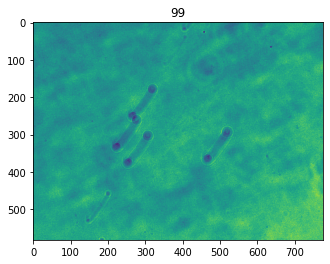

Duration:  21.967034101486206


In [11]:
%matplotlib inline

def show_image(image, i):
    clear_output(wait=True)
    # get the pixels in numpy array and reshape it according to height and width
    image_array = np.reshape(image, newshape=[-1, Height, Width])
    # for display, we can scale the image into the range of 0~255
    image_array = (image_array / image_array.max() * 255).astype("uint8")
    # return the first channel if multiple exists
    plt.figure()
    plt.title(i)
    plt.imshow(image_array[0, :, :])
    plt.show()

start = time.time()
Core.start_continuous_sequence_acquisition(17)
time.sleep(1)
for i in range(100):
    image = Core.get_last_image()
    show_image(image, i)
Core.stop_sequence_acquisition()
print("Duration: ", time.time() - start)